In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/home/palnika-chavan/Downloads/Dataset/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning
1. handle missing values
2. handle duplicates
3. check data types
4. understand the dataset

In [4]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [9]:
df['Gender'] = df['Gender'].replace("Fe Male", "Female")
df['MaritalStatus'] = df['MaritalStatus'].replace("Single", "Unmarried")

In [10]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [11]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5))  # % of missing values

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [12]:
df.Age.fillna(df.Age.median(), inplace = True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace = True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace = True)
df.NumberOfTrips.fillna(0, inplace = True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace = True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace = True)

In [13]:
df.drop('CustomerID', axis = 1, inplace = True)

In [14]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace = True, axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('ProdTaken', axis = 1)
y = df['ProdTaken']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [18]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer  # combine transformations on multiple columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ])

In [20]:
x_train = preprocessor.fit_transform(x_train)

In [21]:
x_test = preprocessor.transform(x_test)

In [22]:
# machine learning training 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {
    'Random Forest' : RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    # 'Support Vector Machine' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    # 'K Neighbors' : KNeighborsClassifier(),
    # 'Naive Bayes' : GaussianNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 1.0000
- Recall: 0.9986
- Roc Auc Score: 0.9993
----------------------------------
Model performance for Test set
- Accuracy: 0.9213
- F1 score: 0.9145
- Precision: 0.9597
- Recall: 0.6230
- Roc Auc Score: 0.8083


Logistic Regression
Model performance for Training set
- Accuracy: 0.8458
- F1 score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9131
- F1 score: 0.9125
- Precision: 0.7880
- Recall: 0.7592
- Roc Auc Score: 0.8548




In [24]:
rf_params = {
            "max_depth": [5, 8, 15, None, 10],
            "max_features": [5, 7, "auto", 8],
            "min_samples_split": [2, 8, 15, 20],
            "n_estimators": [100, 200, 500, 1000]
        }

randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params) 
]

In [25]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                n_jobs=-1,
                                verbose=2)
    random.fit(x_train, y_train)
    model_params[name] = random.best_params_
    
for model_name in model_params:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {
    'Random Forest' : RandomForestClassifier(n_estimators=500, min_samples_split= 2, max_features=8, max_depth=None),
    
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9346
- F1 score: 0.9303
- Precision: 0.9635
- Recall: 0.6911
- Roc Auc Score: 0.8424




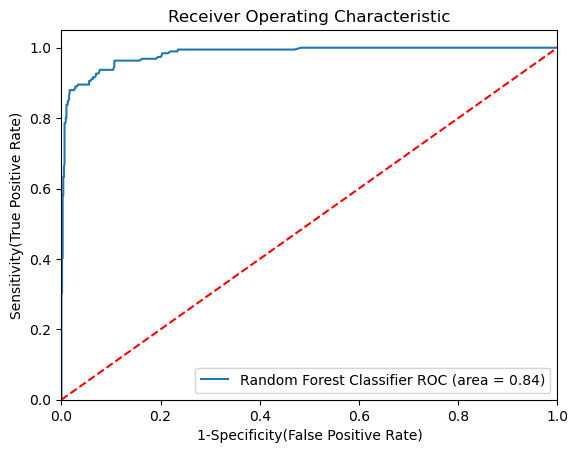

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500, min_samples_split= 2, max_features=8, max_depth=None),
    'auc':  0.8424
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 